In [1]:
# %%  imports 
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import time
from scipy.stats import genextreme, genpareto
from datetime import datetime

In [2]:
def get_batches(snr, bat_max_size):
    bat_max_size = 5
    num_bats = int(np.floor(len(snr)/bat_max_size))
    ind_max = int(bat_max_size*num_bats)
    snr_min = (np.reshape(snr[:ind_max], (num_bats,-1)))
    snr_min = np.array([min(snr_min[i]) for i in range(num_bats)])
    return snr_min, num_bats, ind_max

In [3]:
snr = np.genfromtxt('channel_1597_SNR.csv', dtype='float',delimiter=',')

In [4]:
snr_gen = np.genfromtxt('generated_snr_data.csv', dtype='float',delimiter=',')

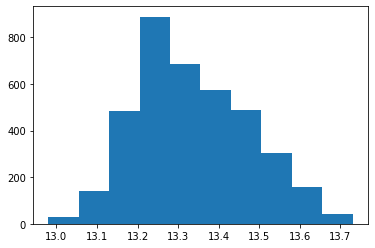

In [5]:
plt.hist(snr)
plt.show()

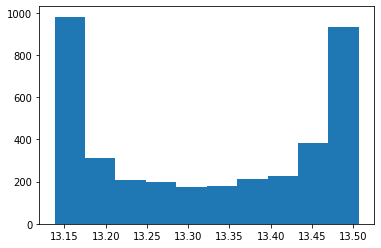

In [6]:
plt.hist(snr_gen)
plt.show()

In [7]:
snr_min, num_bats, ind_max = get_batches(snr, 5)
snr_min_gen, num_bats_gen, ind_max_gen = get_batches(snr_gen, 5)

Original shape, loc, scale = 0.14775154299573307, 13.221110414050269, 0.11286229748342655
Generated shape, loc, scale = -0.9591085740789903, 13.144718333826294, 0.008602721035770757


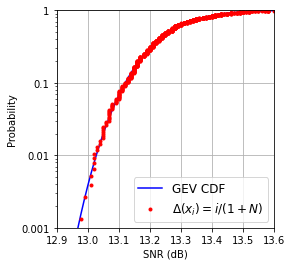

In [8]:
shape, loc, scale = genextreme.fit(snr_min)
shape_gen, loc_gen, scale_gen = genextreme.fit(snr_min_gen)
print("Original shape, loc, scale = " + str(shape) + ', ' + str(loc) + ', ' + str(scale))
print("Generated shape, loc, scale = " + str(shape_gen) + ', ' + str(loc_gen) + ', ' + str(scale_gen))
gev_cdf_x = np.linspace(5,15,100000)
snr_y = (np.linspace(1,num_bats,num_bats))/(1+len(snr_min))  # empirical probability
#fig, ax = plt.subplots(facecolor='w')
fig = plt.figure(figsize=(4,4))
ax1 = fig.add_subplot(111)
plt.semilogy(gev_cdf_x, genextreme.cdf(gev_cdf_x, shape, loc, scale), 'b-', label = "GEV CDF")
plt.semilogy(np.sort(snr_min), snr_y, 'r.', label = "$\Delta(x_i) = i/(1+N)$")
plt.xlim([12.9,13.6])
plt.ylim([1e-3,1])
# ax1.set_yticklabels([0.01, 0.1, 1])
# ax1.set_yticks([0.01, 0.1, 1])
plt.ylabel("Probability")
plt.yticks([0.001, 0.01, 0.1, 1])
ax1.set_yticklabels([0.001, 0.01, 0.1, 1])
#plt.xlabel("SNR (dB)")
plt.xlabel("SNR (dB)")
plt.legend(loc=4, prop={'size': 12})
plt.grid()
ax1.set_aspect(1.0/ax1.get_data_ratio(), adjustable='box')
#plt.savefig('figures/OFC_fig_1.pdf', dpi=200,bbox_inches='tight')
plt.show()

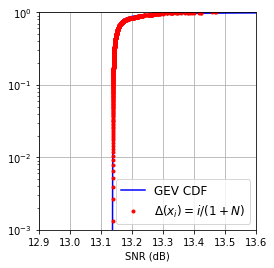

In [9]:
gev_cdf_x = np.linspace(5,15,100000)
snr_y_gen = (np.linspace(1,num_bats_gen,num_bats_gen))/(1+len(snr_min_gen))  # empirical probability
#fig, ax = plt.subplots(facecolor='w')
fig = plt.figure(figsize=(4,4))
ax1 = fig.add_subplot(111)
plt.semilogy(gev_cdf_x, genextreme.cdf(gev_cdf_x, shape_gen, loc_gen, scale_gen), 'b-', label = "GEV CDF")
plt.semilogy(np.sort(snr_min_gen), snr_y_gen, 'r.', label = "$\Delta(x_i) = i/(1+N)$")
plt.xlim([12.9,13.6])
plt.ylim([1e-3,1])
# ax1.set_yticklabels([0.01, 0.1, 1])
# ax1.set_yticks([0.01, 0.1, 1])
# plt.ylabel("Probability")
# plt.yticks([0.001, 0.01, 0.1, 1])
# ax1.set_yticklabels([0.001, 0.01, 0.1, 1])
#plt.xlabel("SNR (dB)")
plt.xlabel("SNR (dB)")
plt.legend(loc=4, prop={'size': 12})
plt.grid()
ax1.set_aspect(1.0/ax1.get_data_ratio(), adjustable='box')
#plt.savefig('figures/OFC_fig_1.pdf', dpi=200,bbox_inches='tight')
plt.show()